<a href="https://colab.research.google.com/github/ruthkum/ruthresh/blob/main/Final_Project_(E_COMMERCE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/classification_data (1).csv'
df = pd.read_csv(file_path)

df.head()

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900.0,0.0,5617.0,0.000000e+00,food////food////food,0.0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900.0,0.0,5617.0,0.000000e+00,food////food////food,0.0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843.0,0.0,77417.0,1.477195e+09,"(not set)////baby_products--milk,_food_&_juice...",1.0,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592.0,0.0,1576.0,0.000000e+00,food////food,0.0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592.0,0.0,1576.0,0.000000e+00,food////food,0.0,2021-01-01


In [ ]:
import pandas as pd

# Define the file path
file_path = '/content/classification_data (1).csv'

# Try loading the CSV with the new `on_bad_lines` argument to handle problematic rows
try:
    df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')
except pd.errors.ParserError:
    print("There was a parsing error. Skipping problematic rows.")

# Display the first 5 rows of the dataframe
df.head()


,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20729 entries, 0 to 20728
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           20729 non-null  int64  
 1   count_hit               20729 non-null  int64  
 2   channelGrouping         20729 non-null  object 
 3   totals_newVisits        20728 non-null  float64
 4   device_browser          20728 non-null  object 
 5   device_operatingSystem  20728 non-null  object 
 6   device_isMobile         20728 non-null  object 
 7   device_deviceCategory   20728 non-null  object 
 8   geoNetwork_region       20728 non-null  object 
 9   geoNetwork_latitude     20728 non-null  float64
 10  geoNetwork_longitude    20728 non-null  float64
 11  historic_session        20728 non-null  float64
 12  historic_session_page   20728 non-null  float64
 13  youtube                 20728 non-null  float64
 14  avg_session_time        20728 non-null

In [ ]:
# 1. Check for null values and display the columns with missing values
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values[null_values > 0])

Null values in each column:
Series([], dtype: int64)


In [ ]:
# 2. Drop duplicates if any
initial_shape = df.shape
df.drop_duplicates(inplace=True)
new_shape = df.shape
print(f"Removed duplicates: {initial_shape[0] - new_shape[0]} rows removed.")

Removed duplicates: 90793 rows removed.


In [ ]:
# 3. Display dataset shape
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (9207, 46)


In [ ]:
# 4. Describe the dataset (numeric columns)
print("Basic statistics of numeric features:")
print(df.describe())

Basic statistics of numeric features:
       count_session     count_hit  totals_newVisits  geoNetwork_latitude  \
count    9207.000000   9207.000000       9207.000000          9207.000000   
mean       19.908005   2489.793853          0.012382            24.887025   
std        21.059017   3399.778210          0.110589             3.414327   
min         1.000000      2.000000          0.000000           -33.924900   
25%         7.000000    525.000000          0.000000            24.453900   
50%        14.000000   1347.000000          0.000000            25.204800   
75%        26.000000   3149.000000          0.000000            25.204800   
max       270.000000  48744.000000          1.000000            59.329300   

       geoNetwork_longitude  historic_session  historic_session_page  youtube  \
count           9207.000000       9207.000000            9207.000000   9207.0   
mean              54.271322       8449.205061            1807.767785      0.0   
std                8.8529

EDA GRAPH :

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


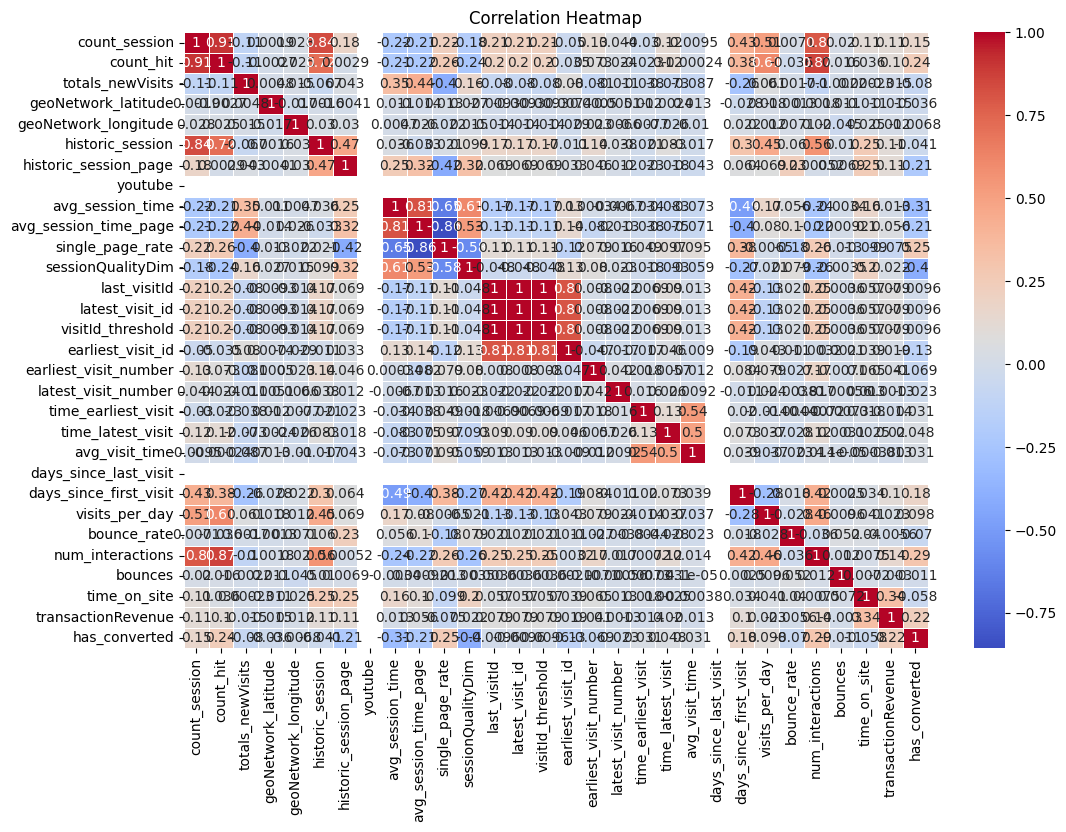

In [ ]:
# 1. Heatmap: Correlation between numeric variables
plt.figure(figsize=(12, 8))
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

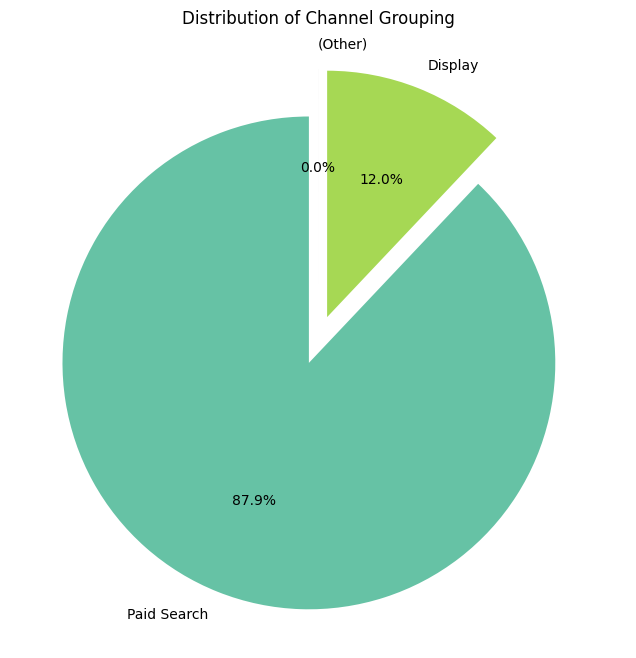

In [ ]:
# 2. Pie Chart: Distribution of a feature variable (for example 'channelGrouping')
# Replace 'channelGrouping' with the feature you want to visualize
plt.figure(figsize=(8, 8))
df['channelGrouping'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2', explode=[0.1]*df['channelGrouping'].nunique())
plt.title('Distribution of Channel Grouping')
plt.ylabel('')  # To remove the y-axis label
plt.show()

FEATURE VAIRABLE :

In [ ]:
# Display the feature variables (columns) and their data types
print("Feature Variables and their Data Types:")
print(df.dtypes)

Feature Variables and their Data Types:
count_session               int64
count_hit                   int64
channelGrouping            object
totals_newVisits            int64
device_browser             object
device_operatingSystem     object
device_isMobile              bool
device_deviceCategory      object
geoNetwork_region          object
geoNetwork_latitude       float64
geoNetwork_longitude      float64
historic_session            int64
historic_session_page       int64
youtube                     int64
avg_session_time          float64
avg_session_time_page     float64
single_page_rate          float64
sessionQualityDim           int64
last_visitId                int64
latest_visit_id             int64
visitId_threshold           int64
earliest_visit_id           int64
earliest_visit_number       int64
latest_visit_number         int64
time_earliest_visit       float64
time_latest_visit         float64
avg_visit_time              int64
days_since_last_visit       int64
days_sin

Encoding Categorical Variables  :

In [ ]:
# Identify the categorical columns
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns

# Apply one-hot encoding to categorical columns
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check the shape of the dataset before and after encoding
print(f"Original shape: {data.shape}")
print(f"Encoded shape: {encoded_data.shape}")


Original shape: (100000, 46)
Encoded shape: (100000, 4738)


Feature Scaling/Normalization :

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select only numerical columns for scaling
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_data = data[numerical_columns]

Outlier Detection and Removal :

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate Z-scores for each numerical column
z_scores = np.abs(stats.zscore(data[numerical_columns]))

# Define a threshold for Z-score (e.g., 3 for common outliers)
threshold = 3

# Filter rows where the Z-score is below the threshold (no outliers)
data_no_outliers = data[(z_scores < threshold).all(axis=1)]

# Check the shape before and after removing outliers
print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers: {data_no_outliers.shape}")


Original data shape: (100000, 50)
Data shape after removing outliers: (0, 50)


Dealing with Imbalanced Data :

Step 1: Check for Class Imbalance :

In [ ]:
# Check the class distribution
class_distribution = data['has_converted'].value_counts()
print(class_distribution)


has_converted
1    51727
0    48273
Name: count, dtype: int64


Step 2: Techniques to Handle Imbalanced Data
1. Random Oversampling

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data[data['has_converted'] == 0]
minority_class = data[data['has_converted'] == 1]

# Upsample minority class
minority_upsampled = resample(minority_class,
                              replace=True,    # Sample with replacement
                              n_samples=len(majority_class),  # Match the majority class size
                              random_state=42)  # Reproducibility

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])

# Check the new class distribution
print(data_upsampled['has_converted'].value_counts())


has_converted
0    48273
1    48273
Name: count, dtype: int64


Feature Engineering :
Step 1: Date Feature Extraction

In [ ]:
import pandas as pd

# Load the dataset (update 'path_to_your_file.csv' to the actual path)
data = pd.read_csv('/content/classification_data (1).csv')

# Check if the dataset loaded properly
print(data.head())


   count_session  count_hit channelGrouping  totals_newVisits  \
0              9       1194         (Other)                 0   
1              9       1194         (Other)                 0   
2             28       1816     Paid Search                 0   
3              2        299     Paid Search                 0   
4              2        299     Paid Search                 0   

    device_browser device_operatingSystem  device_isMobile  \
0  GoogleAnalytics                Android             True   
1  GoogleAnalytics                Android             True   
2  GoogleAnalytics                Android             True   
3  GoogleAnalytics                Android             True   
4  GoogleAnalytics                Android             True   

  device_deviceCategory geoNetwork_region  geoNetwork_latitude  ...  \
0                mobile           Sharjah              25.3463  ...   
1                mobile           Sharjah              25.3463  ...   
2                mobile

In [ ]:
# Convert 'target_date' to datetime if it's not already
data['target_date'] = pd.to_datetime(data['target_date'])

# Extract year, month, day, and weekday from 'target_date'
data['year'] = data['target_date'].dt.year
data['month'] = data['target_date'].dt.month
data['day'] = data['target_date'].dt.day
data['weekday'] = data['target_date'].dt.weekday

# Drop 'target_date' if no longer needed
data.drop(columns=['target_date'], inplace=True)

# Check the new features
print(data[['year', 'month', 'day', 'weekday']].head())


   year  month  day  weekday
0  2021      1    1        4
1  2021      1    1        4
2  2021      1    1        4
3  2021      1    1        4
4  2021      1    1        4


Step 2: Interaction Features

In [ ]:
# Create interaction feature between 'count_session' and 'avg_session_time'
data['session_time_interaction'] = data['count_session'] * data['avg_session_time']

# Check the new feature
print(data[['count_session', 'avg_session_time', 'session_time_interaction']].head())


   count_session  avg_session_time  session_time_interaction
0              9        722.666667                    6504.0
1              9        722.666667                    6504.0
2             28        445.214286                   12466.0
3              2        787.500000                    1575.0
4              2        787.500000                    1575.0


Step 3: Binning Continuous Features

In [ ]:
# Example: Binning 'transactionRevenue' into categories
data['revenue_bin'] = pd.cut(data['transactionRevenue'], bins=[0, 100, 1000, 10000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

# Check the binned feature
print(data[['transactionRevenue', 'revenue_bin']].head())


   transactionRevenue revenue_bin
0                   0         NaN
1                   0         NaN
2          1477195214   Very High
3                   0         NaN
4                   0         NaN


Step 4: Aggregation of Features

In [ ]:
# Example: Aggregating 'transactionRevenue' by 'channelGrouping'
agg_data = data.groupby('channelGrouping').agg({
    'transactionRevenue': ['mean', 'sum', 'count']
}).reset_index()

# Rename columns after aggregation
agg_data.columns = ['channelGrouping', 'mean_revenue', 'total_revenue', 'transaction_count']

# Check the aggregated data
print(agg_data.head())


  channelGrouping  mean_revenue   total_revenue  transaction_count
0         (Other)  0.000000e+00               0                  2
1         Display  1.938173e+08   2335498182564              12050
2     Paid Search  1.946613e+08  17120070770365              87948


Step 5: Log Transformation

In [ ]:
# Apply log transformation to 'transactionRevenue' to reduce skewness
data['log_transactionRevenue'] = np.log1p(data['transactionRevenue'])  # log1p handles log(0)

# Check the new transformed feature
print(data[['transactionRevenue', 'log_transactionRevenue']].head())


   transactionRevenue  log_transactionRevenue
0                   0                0.000000
1                   0                0.000000
2          1477195214               21.113411
3                   0                0.000000
4                   0                0.000000


Step 6: Drop or Modify Redundant Features (Optional)

In [ ]:
# Drop a column if it exists, ignore the error if it doesn't
data.drop(columns=['unnecessary_column'], inplace=True, errors='ignore')

# Check the dataset after attempting to drop
print(data.head())


   count_session  count_hit channelGrouping  totals_newVisits  \
0              9       1194         (Other)                 0   
1              9       1194         (Other)                 0   
2             28       1816     Paid Search                 0   
3              2        299     Paid Search                 0   
4              2        299     Paid Search                 0   

    device_browser device_operatingSystem  device_isMobile  \
0  GoogleAnalytics                Android             True   
1  GoogleAnalytics                Android             True   
2  GoogleAnalytics                Android             True   
3  GoogleAnalytics                Android             True   
4  GoogleAnalytics                Android             True   

  device_deviceCategory geoNetwork_region  geoNetwork_latitude  ...  \
0                mobile           Sharjah              25.3463  ...   
1                mobile           Sharjah              25.3463  ...   
2                mobile

Stat Analysis:
Step 1: Summary Statistics

In [ ]:
# Generate summary statistics for the dataset
summary_statistics = data.describe(include='all')

# Display summary statistics
print(summary_statistics)


        count_session      count_hit channelGrouping  totals_newVisits  \
count   100000.000000  100000.000000          100000     100000.000000   
unique            NaN            NaN               3               NaN   
top               NaN            NaN     Paid Search               NaN   
freq              NaN            NaN           87948               NaN   
mean        21.532440    3671.722790             NaN          0.020380   
std         24.002385    4627.338737             NaN          0.141297   
min          1.000000       2.000000             NaN          0.000000   
25%          6.000000     971.000000             NaN          0.000000   
50%         15.000000    2209.000000             NaN          0.000000   
75%         29.000000    4812.000000             NaN          0.000000   
max        270.000000   48744.000000             NaN          1.000000   

         device_browser device_operatingSystem device_isMobile  \
count            100000                 10000

Step 2: Check for Correlation

In [ ]:
# Select only numerical columns from the dataset
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                          count_session  count_hit  totals_newVisits  \
count_session                  1.000000   0.910768         -0.113955   
count_hit                      0.910768   1.000000         -0.106085   
totals_newVisits              -0.113955  -0.106085          1.000000   
geoNetwork_latitude            0.001908  -0.002656          0.004786   
geoNetwork_longitude           0.027741   0.025042          0.015334   
historic_session               0.839560   0.716836         -0.067059   
historic_session_page          0.176914   0.002928          0.042629   
youtube                             NaN        NaN               NaN   
avg_session_time              -0.223344  -0.210763          0.345303   
avg_session_time_page         -0.210169  -0.221032          0.438296   
single_page_rate               0.223119   0.260696         -0.399994   
sessionQualityDim             -0.175014  -0.237133          0.159811   
last_visitId                   0.214684   0.196538         -0.07

visualize the correlation matrix:

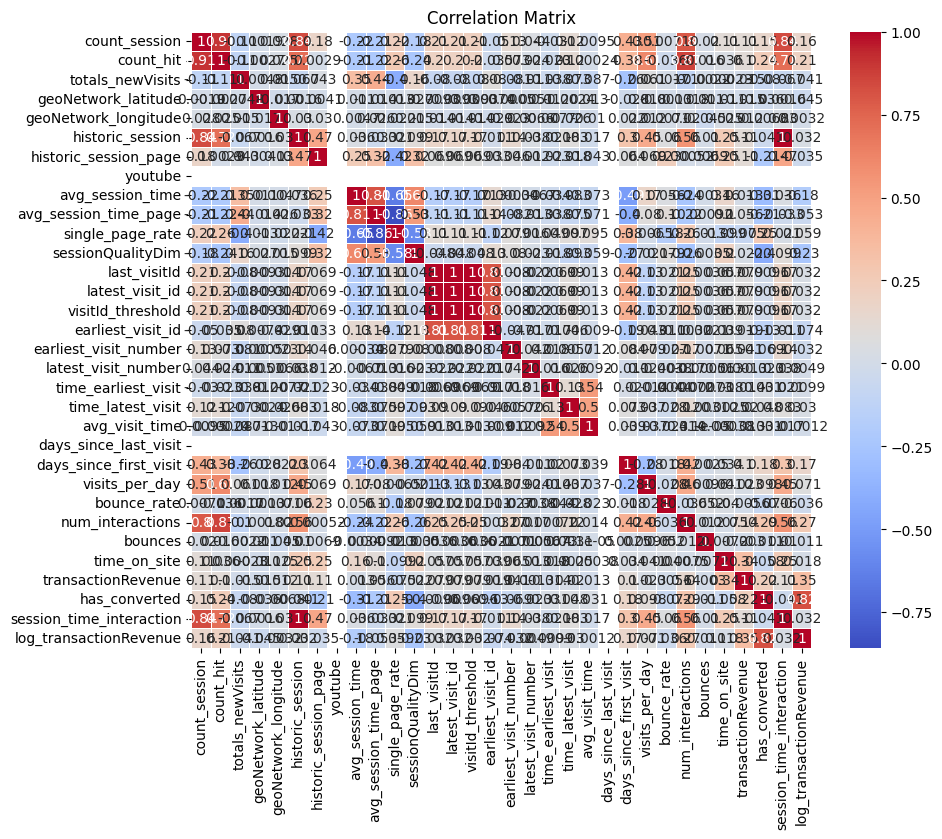

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Step 3: Distribution of Numerical Features

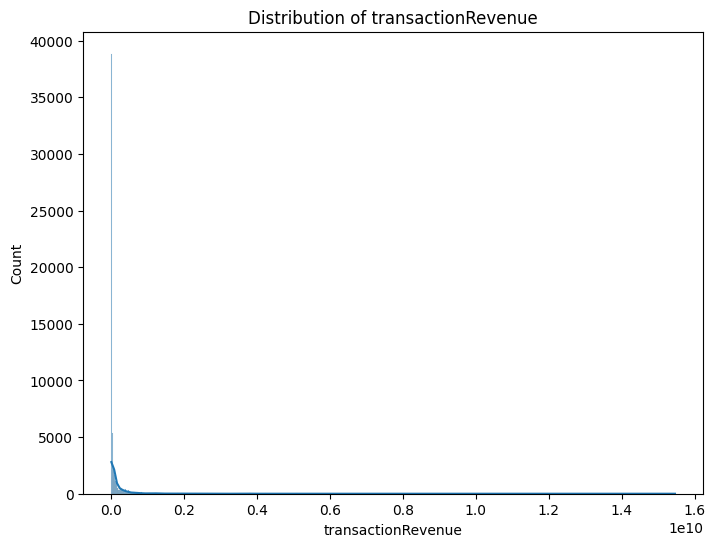

In [ ]:
# Plot the distribution of a specific feature (e.g., 'transactionRevenue')
plt.figure(figsize=(8, 6))
sns.histplot(data['transactionRevenue'], kde=True)
plt.title('Distribution of transactionRevenue')
plt.show()

Step 4: Outlier Analysis

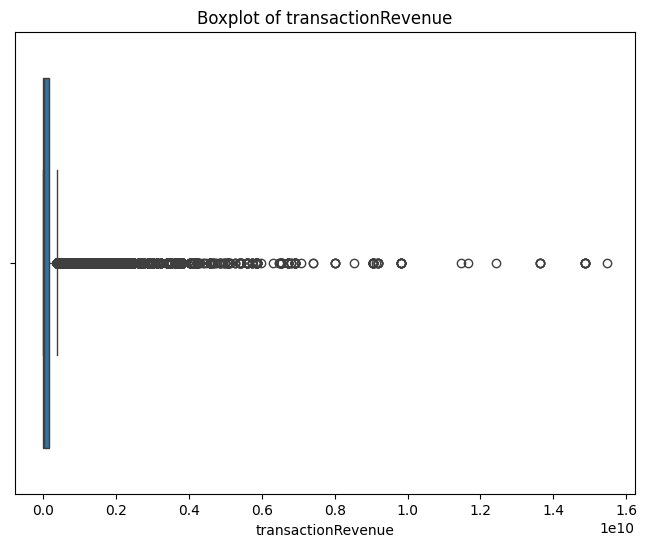

In [ ]:
# Boxplot for a numerical feature (e.g., 'transactionRevenue')
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['transactionRevenue'])
plt.title('Boxplot of transactionRevenue')
plt.show()


Step 5: Grouped Statistical Analysis

In [ ]:
# Group data by 'channelGrouping' and compute mean and median of 'transactionRevenue'
grouped_stats = data.groupby('channelGrouping')['transactionRevenue'].agg(['mean', 'median', 'sum', 'count'])

# Display grouped statistics
print(grouped_stats)


                         mean      median             sum  count
channelGrouping                                                 
(Other)          0.000000e+00         0.0               0      2
Display          1.938173e+08  31555446.0   2335498182564  12050
Paid Search      1.946613e+08  40504952.0  17120070770365  87948


Step 6: Hypothesis Testing (Optional)

In [ ]:
from scipy.stats import ttest_ind

# Filter two groups (e.g., 'Direct' and 'Organic Search' from 'channelGrouping')
group1 = data[data['channelGrouping'] == 'Direct']['transactionRevenue']
group2 = data[data['channelGrouping'] == 'Organic Search']['transactionRevenue']

# Perform independent t-test
t_stat, p_value = ttest_ind(group1.dropna(), group2.dropna())

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: nan, P-value: nan


Feature Selection
Option 1: Remove Rows with Missing Values

In [ ]:
# Drop rows with missing values
data_cleaned = data.dropna()

# Convert categorical features to numerical using one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Split features and target
X = data_encoded.drop('has_converted', axis=1)
y = data_encoded['has_converted']

# Proceed with feature selection
select_k_best = SelectKBest(score_func=f_classif, k=10)
X_selected = select_k_best.fit_transform(X, y)

# Get the scores of features
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': select_k_best.scores_})
print(feature_scores.nlargest(10, 'Score'))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   8   22   33   34   35 3568 3569 3570] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


                             Feature         Score
51        device_operatingSystem_iOS  33786.994645
46    device_operatingSystem_Android  22877.579840
12                 sessionQualityDim  22135.352114
11                  single_page_rate  16560.834792
7              historic_session_page  13114.754434
9                   avg_session_time  12074.797915
10             avg_session_time_page  11115.173461
43    device_browser_GoogleAnalytics   4992.052985
2808             products_array_food   4635.225600
40             device_browser_Chrome   4230.531031


Handle Missing Values (Optional)

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values before encoding
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Then proceed with one-hot encoding and feature selection as shown above
X_encoded = pd.get_dummies(X_imputed, columns=categorical_columns, drop_first=True)


Step 1: Separate Numerical and Categorical Columns :

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Drop rows where the target variable (y) contains NaN
data_cleaned = data.dropna(subset=['has_converted'])

# Separate features and target after removing rows with missing target values
X = data_cleaned.drop('has_converted', axis=1)  # Features
y = data_cleaned['has_converted']  # Target

# Step 1: Separate numerical and categorical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

# Step 2: Impute missing values
# Impute numerical columns with mean
imputer_num = SimpleImputer(strategy='mean')
X_numerical = pd.DataFrame(imputer_num.fit_transform(X[numerical_columns]), columns=numerical_columns)

# Impute categorical columns with most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
X_categorical = pd.DataFrame(imputer_cat.fit_transform(X[categorical_columns]), columns=categorical_columns)

# Step 3: One-hot encode categorical columns
X_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Combine numerical and encoded categorical data
X_final = pd.concat([X_numerical, X_encoded], axis=1)

# Step 4: Use SelectKBest to select top 10 features based on ANOVA F-statistic
select_k_best = SelectKBest(score_func=f_classif, k=10)
X_selected = select_k_best.fit_transform(X_final, y)

# Step 5: Get the scores of features
feature_scores = pd.DataFrame({'Feature': X_final.columns, 'Score': select_k_best.scores_})
print(feature_scores.nlargest(10, 'Score'))  # Top 10 features


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 7 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


                           Feature         Score
41      device_operatingSystem_iOS  17027.140946
11               sessionQualityDim   7107.254740
8                 avg_session_time   3825.302304
10                single_page_rate   3270.517163
25                num_interactions   2960.849709
9            avg_session_time_page   2227.816217
99          earliest_source_mobile   2007.963352
28              transactionRevenue   1771.674792
34  device_browser_GoogleAnalytics   1759.286553
1                        count_hit   1672.132795


Impute Missing Values

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Step 1: Load your dataset with specific data types
data = pd.read_csv('/content/classification_data (1).csv', dtype={'column1': 'category', 'column2': 'category'})  # Specify categorical columns

# Step 2: Separate features and target
X = data.drop('has_converted', axis=1)
y = data['has_converted']

# Step 3: Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Step 4: Define preprocessors for numerical and categorical columns
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# One-hot encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Using sparse output

# Step 5: Create a column transformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, numerical_cols),
        ('cat', Pipeline(steps=[('imputer', categorical_imputer), ('encoder', encoder)]), categorical_cols)
    ],
    remainder='drop'  # Drop other columns if any
)

# Step 6: Impute and encode the data (returns a sparse matrix)
X_processed = preprocessor.fit_transform(X)

# Step 7: Get the feature names after transformation
encoded_feature_names = numerical_cols.tolist() + list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols))

# Step 8: Convert the processed sparse matrix back to a DataFrame if necessary
# For sparse matrices, it's often more efficient to work with them directly.
# You can still convert to DataFrame if required:
X_processed_df = pd.DataFrame(X_processed.toarray(), columns=encoded_feature_names)  # Convert sparse to dense if needed

# Step 9: Proceed with feature selection
select_k_best = SelectKBest(score_func=f_classif, k=10)
X_selected = select_k_best.fit_transform(X_processed, y)

# Step 10: Get the scores of features
feature_scores = pd.DataFrame({'Feature': encoded_feature_names, 'Score': select_k_best.scores_})
print(feature_scores.nlargest(10, 'Score'))


                             Feature         Score
47        device_operatingSystem_iOS  44628.767793
42    device_operatingSystem_Android  30911.409835
11                 sessionQualityDim  19422.174463
8                   avg_session_time  10752.668007
25                  num_interactions   9524.205629
10                  single_page_rate   6874.137505
1                          count_hit   6068.575046
3379             products_array_food   5766.782362
172           earliest_source_mobile   5444.255727
28                transactionRevenue   5289.303668


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Logistic Regression
Random Forest Classifier
Support Vector Machine (SVM)

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Step 1: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Step 2: Train and evaluate three different models

### 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence issues
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(classification_report(y_test, y_pred_log_reg))

### 2. Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

### 3. Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate SVM
print("\nSupport Vector Machine (SVM):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.8041701887855734
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81      3514
         1.0       0.83      0.77      0.80      3584

    accuracy                           0.80      7098
   macro avg       0.81      0.80      0.80      7098
weighted avg       0.81      0.80      0.80      7098


Random Forest Classifier:
Accuracy: 0.9971823048746126
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3514
         1.0       1.00      1.00      1.00      3584

    accuracy                           1.00      7098
   macro avg       1.00      1.00      1.00      7098
weighted avg       1.00      1.00      1.00      7098


Support Vector Machine (SVM):
Accuracy: 0.7175260636799098
              precision    recall  f1-score   support

         0.0       0.66      0.87      0.75      3514
         1.0       0.82      0.57      0.67      3584

    accuracy    

STREAMLIT  (E-COMMERCE) :

In [5]:
%%writefile app.py


import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
@st.cache
def load_data():
    data = pd.read_csv('classification_data (1).csv')
    return data

# Load and preprocess data
data = load_data()

# Safeguard to handle missing 'device_browser' column
if 'device_browser' not in data.columns:
    st.error("Error: 'device_browser' column is missing from the dataset. Please check the dataset structure.")
    st.stop()  # Stop the execution of the app if 'device_browser' is missing
else:
    # Select relevant columns
    columns = ['count_session', 'count_hit', 'device_browser', 'device_isMobile', 'has_converted']
    data = data[columns]

    # Handle categorical variables (convert 'device_browser' to dummies)
    data = pd.get_dummies(data, columns=['device_browser'], drop_first=True)

    # Split the data into features and target
    X = data.drop('has_converted', axis=1)
    y = data['has_converted']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model training
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Streamlit App UI
    st.title('E-commerce Conversion Prediction')

    # Sidebar input for predictions
    st.sidebar.header('Enter input for prediction:')

    # Inputs for prediction
    session_count = st.sidebar.number_input('Session Count', min_value=0, max_value=100, value=5)
    hit_count = st.sidebar.number_input('Hit Count', min_value=0, max_value=1000, value=100)
    device_mobile = st.sidebar.selectbox('Is Mobile', [True, False])

    # Extract unique browser values for prediction input
    browser_options = [col.split('_')[-1] for col in data.columns if 'device_browser' in col]
    device_browser = st.sidebar.selectbox('Device Browser', browser_options)

    # Button to trigger the prediction
    if st.sidebar.button('Predict'):
        # Encode browser input
        browser_cols = [col for col in X.columns if 'device_browser' in col]
        device_browser_input = {col: 0 for col in browser_cols}
        for col in browser_cols:
            if device_browser in col:
                device_browser_input[col] = 1

        # Create input dataframe
        user_input = {
            'count_session': session_count,
            'count_hit': hit_count,
            'device_isMobile': int(device_mobile),
            **device_browser_input
        }
        input_df = pd.DataFrame([user_input])

        # Prediction
        prediction = model.predict(input_df)

        # Display prediction result
        if prediction[0] == 1:
            st.write("Prediction: **Converted** - The user will become a customer.")
        else:
            st.write("Prediction: **Not Converted** - The user will not become a customer.")


Writing app.py


In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.4 MB/s eta 0:00:00


In [3]:
! pip install streamlit==1.39.0


In [4]:
! pip install --upgrade streamlit


In [16]:
!pip install -q streamlit

In [17]:
!streamlit run app.py &>/content/logs.txt &

In [18]:
!wget -q -O  - ipv4.icanhazip.com

34.170.219.183


In [19]:
!npx localtunnel --port 8501

your url is: https://fair-dolls-hug.loca.lt
^C


2)  IMAGE PROCESSING :

In [ ]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 16.7 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr

In [ ]:
# Function to display multiple images
def display_images(images, titles):
    plt.figure(figsize=(15, 8))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

In [ ]:
# Read the image
image_path = '/content/4 (1).png'  # Replace with your image path
img = cv2.imread(image_path)


Displaying Original Image:


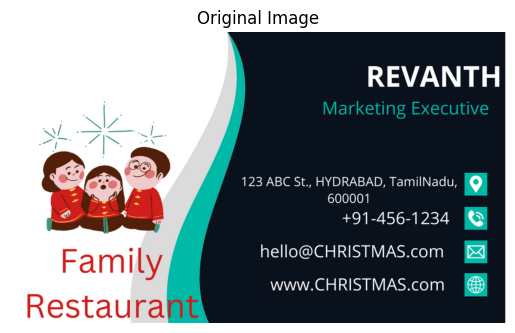

In [ ]:
# Original Image
print("Displaying Original Image:")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

In [ ]:
# Convert image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# Apply edge detection using Canny edge detector
edges = cv2.Canny(img_gray, 100, 200)

In [ ]:
# Apply Gaussian blur to smooth the image
blurred_image = cv2.GaussianBlur(img_gray, (5, 5), 0)

In [ ]:
# Perform binary thresholding
_, thresh_image = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

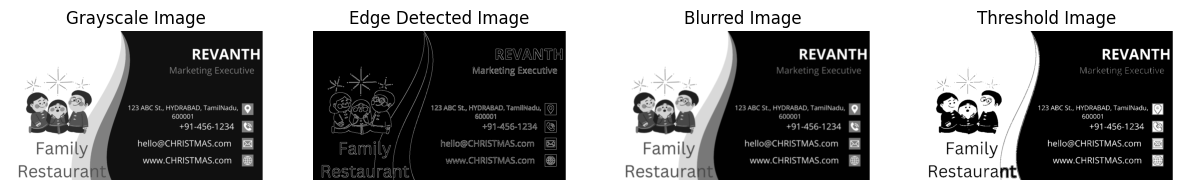

In [ ]:
# Display all preprocessed images
images = [img_gray, edges, blurred_image, thresh_image]
titles = ['Grayscale Image', 'Edge Detected Image', 'Blurred Image', 'Threshold Image']
display_images(images, titles)


In [ ]:
# OCR - Extract text using EasyOCR
reader = easyocr.Reader(['en'])  # Initialize EasyOCR reader for English

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
# Use EasyOCR to perform OCR on the original image
print("OCR - Extracted Text")
results = reader.readtext(image_path)


OCR - Extracted Text


In [ ]:
# Display the OCR results
if results:
    for (bbox, text, prob) in results:
        print(f"Detected Text: {text}, Confidence: {prob:.2f}")
else:
    print("No text detected in the image.")

Detected Text: REVANTH, Confidence: 1.00
Detected Text: Marketing Executive, Confidence: 0.80
Detected Text: 123 ABC St,, HYDRABAD, TamilNadu;, Confidence: 0.71
Detected Text: 600001, Confidence: 1.00
Detected Text: +91-456-1234, Confidence: 0.98
Detected Text: hello@CHRISTMAS.com, Confidence: 0.74
Detected Text: Family, Confidence: 0.84
Detected Text: wWW.CHRISTMAS.com, Confidence: 0.78
Detected Text: Restaurant, Confidence: 1.00


STREAMLIT:

In [ ]:
! pip install streamlit opencv-python-headless easyocr numpy


In [ ]:
%%writefile app.py



import streamlit as st
import cv2
import numpy as np
import easyocr
from PIL import Image

# Function to perform image sharpening
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
    return cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

# Function for edge detection
def edge_detect(image):
    edges = cv2.Canny(image, 100, 200)
    return edges

# Function to apply Gaussian blur
def blur_image(image):
    return cv2.GaussianBlur(image, (15, 15), 0)

# Function to de-blur the image (using simple sharpening as an example)
def deblur_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# OCR function to extract text
def perform_ocr(image):
    reader = easyocr.Reader(['en'])
    results = reader.readtext(image)
    extracted_text = ""
    for (bbox, text, prob) in results:
        extracted_text += f"{text}\n"
    return extracted_text if extracted_text else "No text detected"

# Streamlit app layout
st.title("Image Processing and OCR")

# Upload the image
uploaded_image = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

if uploaded_image is not None:
    # Convert uploaded file to an OpenCV image
    image = np.array(Image.open(uploaded_image).convert('RGB'))
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Buttons for different image processing options
    if st.button("Sharpen Image"):
        sharpened_image = sharpen_image(image)
        st.image(sharpened_image, caption="Sharpened Image", use_column_width=True)

    if st.button("Edge Detect"):
        edges_image = edge_detect(image)
        st.image(edges_image, caption="Edge Detected Image", use_column_width=True)

    if st.button("Blur Image"):
        blurred_image = blur_image(image)
        st.image(blurred_image, caption="Blurred Image", use_column_width=True)

    if st.button("Deblur Image"):
        deblurred_image = deblur_image(image)
        st.image(deblurred_image, caption="Deblurred Image", use_column_width=True)

    # OCR Option
    if st.button("Perform OCR"):
        extracted_text = perform_ocr(image)
        st.subheader("Extracted Text:")
        st.text(extracted_text)


Overwriting app.py


In [28]:
!pip install -q streamlit

In [29]:
!streamlit run app.py &>/content/logs.txt &

In [30]:
!wget -q -O  - ipv4.icanhazip.com

34.170.219.183


In [31]:
!npx localtunnel --port 8501

your url is: https://thin-friends-occur.loca.lt
^C


NLP Project :

Task 1: NLP Preprocessing and Sentiment Analysis

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# Download necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Example text input (replace this with your text)
text = """
Natural Language Processing (NLP) is an exciting field with endless applications.
From chatbots to recommendation engines, NLP is everywhere!
"""


In [ ]:
# Step 1: Lowercasing
text_lower = text.lower()
print("Lowercase Text:\n", text_lower)

Lowercase Text:
 
natural language processing (nlp) is an exciting field with endless applications.
from chatbots to recommendation engines, nlp is everywhere!



In [ ]:
# Step 2: Tokenization
tokens = word_tokenize(text_lower)
print("\nTokenized Text:\n", tokens)


Tokenized Text:
 ['natural', 'language', 'processing', '(', 'nlp', ')', 'is', 'an', 'exciting', 'field', 'with', 'endless', 'applications', '.', 'from', 'chatbots', 'to', 'recommendation', 'engines', ',', 'nlp', 'is', 'everywhere', '!']


In [ ]:
# Step 3: Remove Stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]
print("\nText after Stopword Removal:\n", filtered_tokens)


Text after Stopword Removal:
 ['natural', 'language', 'processing', '(', 'nlp', ')', 'exciting', 'field', 'endless', 'applications', '.', 'chatbots', 'recommendation', 'engines', ',', 'nlp', 'everywhere', '!']


In [ ]:
# Step 4: Remove Punctuation
table = str.maketrans('', '', string.punctuation)
cleaned_tokens = [word.translate(table) for word in filtered_tokens if word.translate(table)]
print("\nText after Punctuation Removal:\n", cleaned_tokens)


Text after Punctuation Removal:
 ['natural', 'language', 'processing', 'nlp', 'exciting', 'field', 'endless', 'applications', 'chatbots', 'recommendation', 'engines', 'nlp', 'everywhere']


In [ ]:
# Step 5: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in cleaned_tokens]
print("\nLemmatized Text:\n", lemmatized_tokens)



Lemmatized Text:
 ['natural', 'language', 'processing', 'nlp', 'exciting', 'field', 'endless', 'application', 'chatbots', 'recommendation', 'engine', 'nlp', 'everywhere']


In [ ]:
# Step 6: Finding Keywords using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5)  # Limit to top 5 keywords
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(lemmatized_tokens)])
keywords = tfidf_vectorizer.get_feature_names_out()
print("\nKeywords:\n", keywords)


Keywords:
 ['application' 'chatbots' 'endless' 'engine' 'nlp']


In [ ]:
# Step 7: Sentiment Analysis
sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(text)
print("\nSentiment Analysis:\n", sentiment)


Sentiment Analysis:
 {'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.7177}


In [ ]:
! pip install streamlit scikit-learn pandas


In [ ]:
import pandas as pd

# Path to the dataset (modify the path as per your local or accessible environment)
dataset_path = '/content/Supermarket Sales.csv'  # Ensure this path points to the correct file

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(dataset_path)
    # Print the first 5 rows of the dataset
    print("Dataset loaded successfully! Here are the first 5 rows:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The dataset file at '{dataset_path}' was not found.")
except pd.errors.ParserError:
    print("Error: There was an issue parsing the dataset file.")


Dataset loaded successfully! Here are the first 5 rows:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83

In [ ]:
# Load the newly uploaded dataset to check its columns
import pandas as pd

# Load the dataset
file_path = '/content/Supermarket Sales.csv'
data = pd.read_csv(file_path)

# Display the columns of the dataset
data.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajshekarreddy1/super-market-sales")

print("Path to dataset files:", path)

100%|██████████| 35.9k/35.9k [00:00<00:00, 36.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rajshekarreddy1/super-market-sales/versions/1


E-COMMERCE (RECOMMENDATION) :

In [27]:
%%writefile app.py

import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Both classification and regression
import random

# Load dataset
@st.cache
def load_data():
    data = pd.read_csv('/content/Supermarket Sales.csv')  # Adjust the file path if necessary
    return data

# Load and preprocess data
data = load_data()

# Safeguard to handle missing 'Product line' column
if 'Product line' not in data.columns:
    st.error("Error: 'Product line' column is missing from the dataset. Please check the dataset structure.")
    st.stop()  # Stop the execution of the app if 'Product line' is missing
else:
    # Store the original 'Product line' for recommendations before encoding
    original_data = data.copy()

    # Select relevant columns for training (adjust as per your dataset)
    columns = ['Quantity', 'Total', 'Product line', 'gross income']
    data = data[columns]

    # Handle categorical variables (convert 'Product line' to dummies)
    data = pd.get_dummies(data, columns=['Product line'], drop_first=True)

    # Add a binary column for conversion prediction (assuming 'Total' or other thresholds could define conversion)
    data['has_converted'] = (data['Total'] > 100).astype(int)  # You can adjust this threshold based on your needs

    # Split the data into features and target for both classification and regression
    X = data.drop(['gross income', 'has_converted'], axis=1)
    y_classification = data['has_converted']  # Target for conversion prediction
    y_regression = data['gross income']  # Target for gross income prediction

    # Split into train and test sets
    X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

    # Model training
    classification_model = RandomForestClassifier()  # For customer conversion
    classification_model.fit(X_train, y_train_class)

    regression_model = RandomForestRegressor()  # For gross income prediction
    regression_model.fit(X_train_reg, y_train_reg)

    # Streamlit App UI
    st.title('Customer Conversion, Regularity & Gross Income Prediction')

    # Sidebar input for predictions
    st.sidebar.header('Enter input for prediction:')

    # Inputs for prediction
    quantity = st.sidebar.number_input('Quantity', min_value=1, max_value=100, value=5)
    total = st.sidebar.number_input('Total Amount', min_value=1, max_value=1000, value=100)

    # Extract unique product line values for prediction input
    product_options = data.columns[data.columns.str.startswith('Product line_')].str.split('_').str[-1].tolist()
    product_line = st.sidebar.selectbox('Product Line', product_options)

    # Button to trigger the prediction
    if st.sidebar.button('Predict'):
        # Encode product line input
        product_cols = [col for col in X.columns if 'Product line' in col]
        product_input = {col: 0 for col in product_cols}
        for col in product_cols:
            if product_line in col:
                product_input[col] = 1

        # Create input dataframe
        user_input = {
            'Quantity': quantity,
            'Total': total,
            **product_input
        }
        input_df = pd.DataFrame([user_input])

        # Prediction for conversion (classification)
        conversion_prediction = classification_model.predict(input_df)

        # Prediction for gross income (regression)
        gross_income_prediction = regression_model.predict(input_df)

        # Determine if customer is regular or irregular
        if total > 500:  # You can adjust this threshold to define regularity
            customer_type = "Regular Customer"
        else:
            customer_type = "Irregular Customer"

        # Display the prediction results
        st.write("## Prediction Results")
        st.write(f"**Customer Type**: {customer_type}")
        st.write(f"**Predicted Gross Income**: ${gross_income_prediction[0]:.2f}")
        if conversion_prediction[0] == 1:
            st.write("**Customer Conversion**: **Converted** - The customer is likely to convert.")
        else:
            st.write("**Customer Conversion**: **Not Converted** - The customer is unlikely to convert.")

    # Button to trigger product recommendation
    if st.sidebar.button('Recommend Product'):
        # Select a random product recommendation from the original 'Product line' column
        recommended_product = original_data.sample(1)

        # Display recommended product details
        st.write("## Recommended Product")
        st.write(f"**Product Line**: {recommended_product['Product line'].values[0]}")
        st.write(f"**Total Price**: ${recommended_product['Total'].values[0]:.2f}")
        st.write(f"**Quantity Available**: {recommended_product['Quantity'].values[0]}")


Overwriting app.py


NLP RUF :

In [ ]:
%%writefile app.py

import streamlit as st
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer

# Download necessary nltk data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Streamlit app
st.title("NLP Pipeline Application")

# Step 1: Input text
text = st.text_area("Enter your text for NLP processing:", "Natural Language Processing (NLP) is an exciting field with endless applications. From chatbots to recommendation engines, NLP is everywhere!")

# Buttons for each step
if st.button("Lowercasing"):
    text_lower = text.lower()
    st.write("Lowercase Text:", text_lower)

if st.button("Tokenization"):
    tokens = word_tokenize(text.lower())  # Tokenize after lowercasing
    st.write("Tokenized Text:", tokens)

if st.button("Remove Stopwords"):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    st.write("Text after Stopword Removal:", filtered_tokens)

if st.button("Remove Punctuation"):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    table = str.maketrans('', '', string.punctuation)
    cleaned_tokens = [word.translate(table) for word in filtered_tokens if word.translate(table)]
    st.write("Text after Punctuation Removal:", cleaned_tokens)

if st.button("Lemmatization"):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    table = str.maketrans('', '', string.punctuation)
    cleaned_tokens = [word.translate(table) for word in filtered_tokens if word.translate(table)]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in cleaned_tokens]
    st.write("Lemmatized Text:", lemmatized_tokens)

if st.button("Find Keywords using TF-IDF"):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    table = str.maketrans('', '', string.punctuation)
    cleaned_tokens = [word.translate(table) for word in filtered_tokens if word.translate(table)]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in cleaned_tokens]
    tfidf_vectorizer = TfidfVectorizer(max_features=5)
    tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(lemmatized_tokens)])
    keywords = tfidf_vectorizer.get_feature_names_out()
    st.write("Keywords:", keywords)

if st.button("Sentiment Analysis"):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    st.write("Sentiment Analysis:", sentiment)

# Instructions to run the app
st.sidebar.markdown("### Instructions")
st.sidebar.markdown("1. Enter text in the input box.")
st.sidebar.markdown("2. Click on the buttons to see the results of different NLP operations.")


Overwriting app.py
